# Single Sphere Gain

**Scott Prahl**

**June 2024**

In this notebook, we show the how an integrating sphere affects the amount of diffuse light detected by the detector.  The gain is defined as the increase in measured light for diffuse light in the sphere relative to a sphere with completely black walls.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import iadpython

%config InlineBackend.figure_format='retina'


def default_sphere():
    R = 30
    d_sphere = 2 * R
    d_sample = 20
    d_third = 15
    d_detector = 10
    s = iadpython.Sphere(
        d_sphere,
        d_sample,
        d_third=d_third,
        d_detector=d_detector,
        r_detector=0.5,
        r_wall=0.75,
        r_std=0.8,
    )
    return s

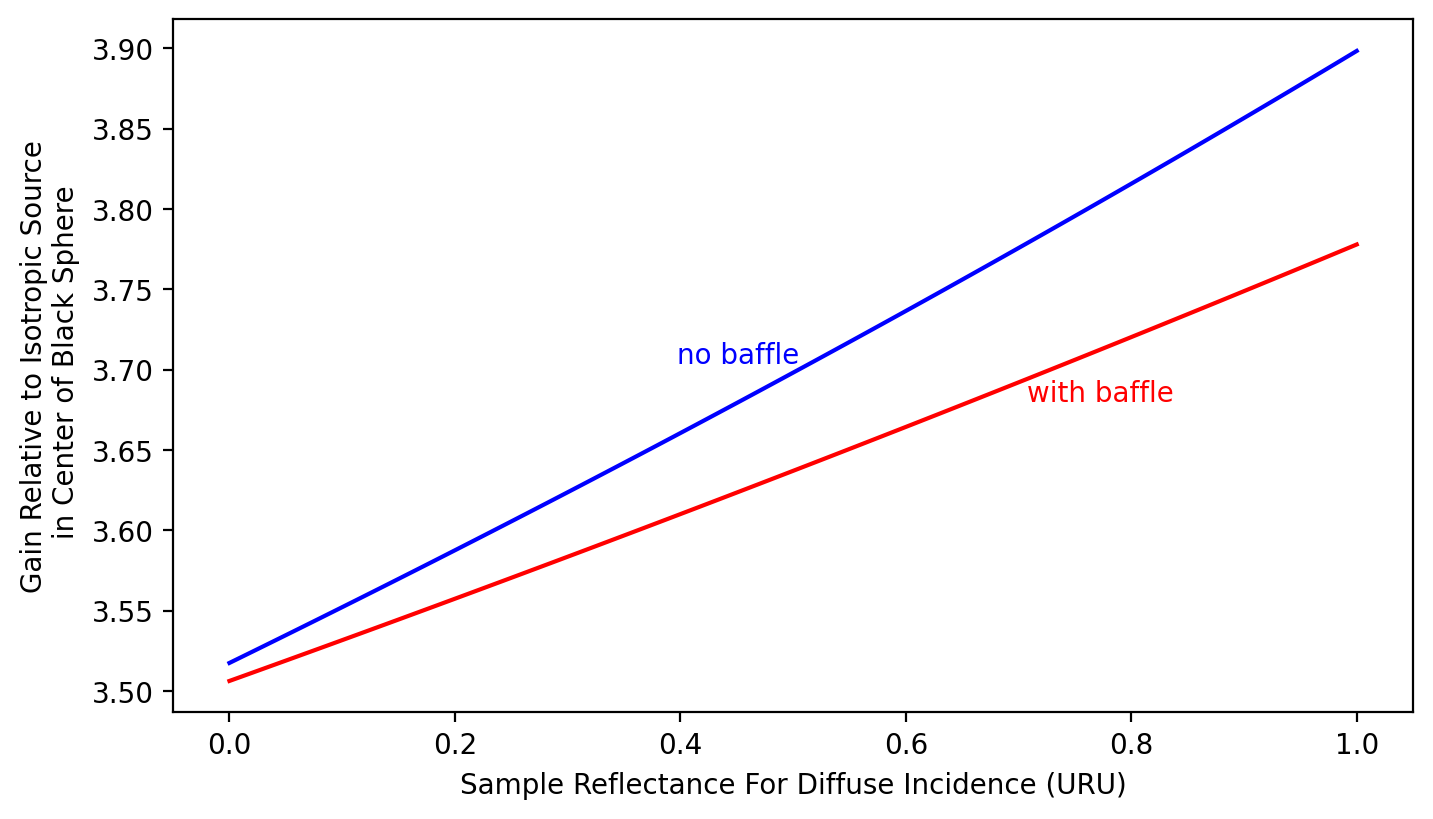

In [2]:
s = default_sphere()
plt.figure(figsize=(8, 4.5))
sample_uru = np.linspace(0, 1, 100)
s.baffle = False
gain = s.gain(sample_uru)
plt.plot(sample_uru, gain, "b")
plt.text(sample_uru[50], gain[50], "no baffle", color="blue", ha="right", va="bottom")

s.baffle = True
gain = s.gain(sample_uru)
plt.plot(sample_uru, gain, "r")
plt.text(sample_uru[70], gain[70], "with baffle", color="red", ha="left", va="top")

plt.xlabel("Sample Reflectance For Diffuse Incidence (URU)")
plt.ylabel("Gain Relative to Isotropic Source\n in Center of Black Sphere")
plt.show()

and we see that the presence or absence of a baffle has a small effect

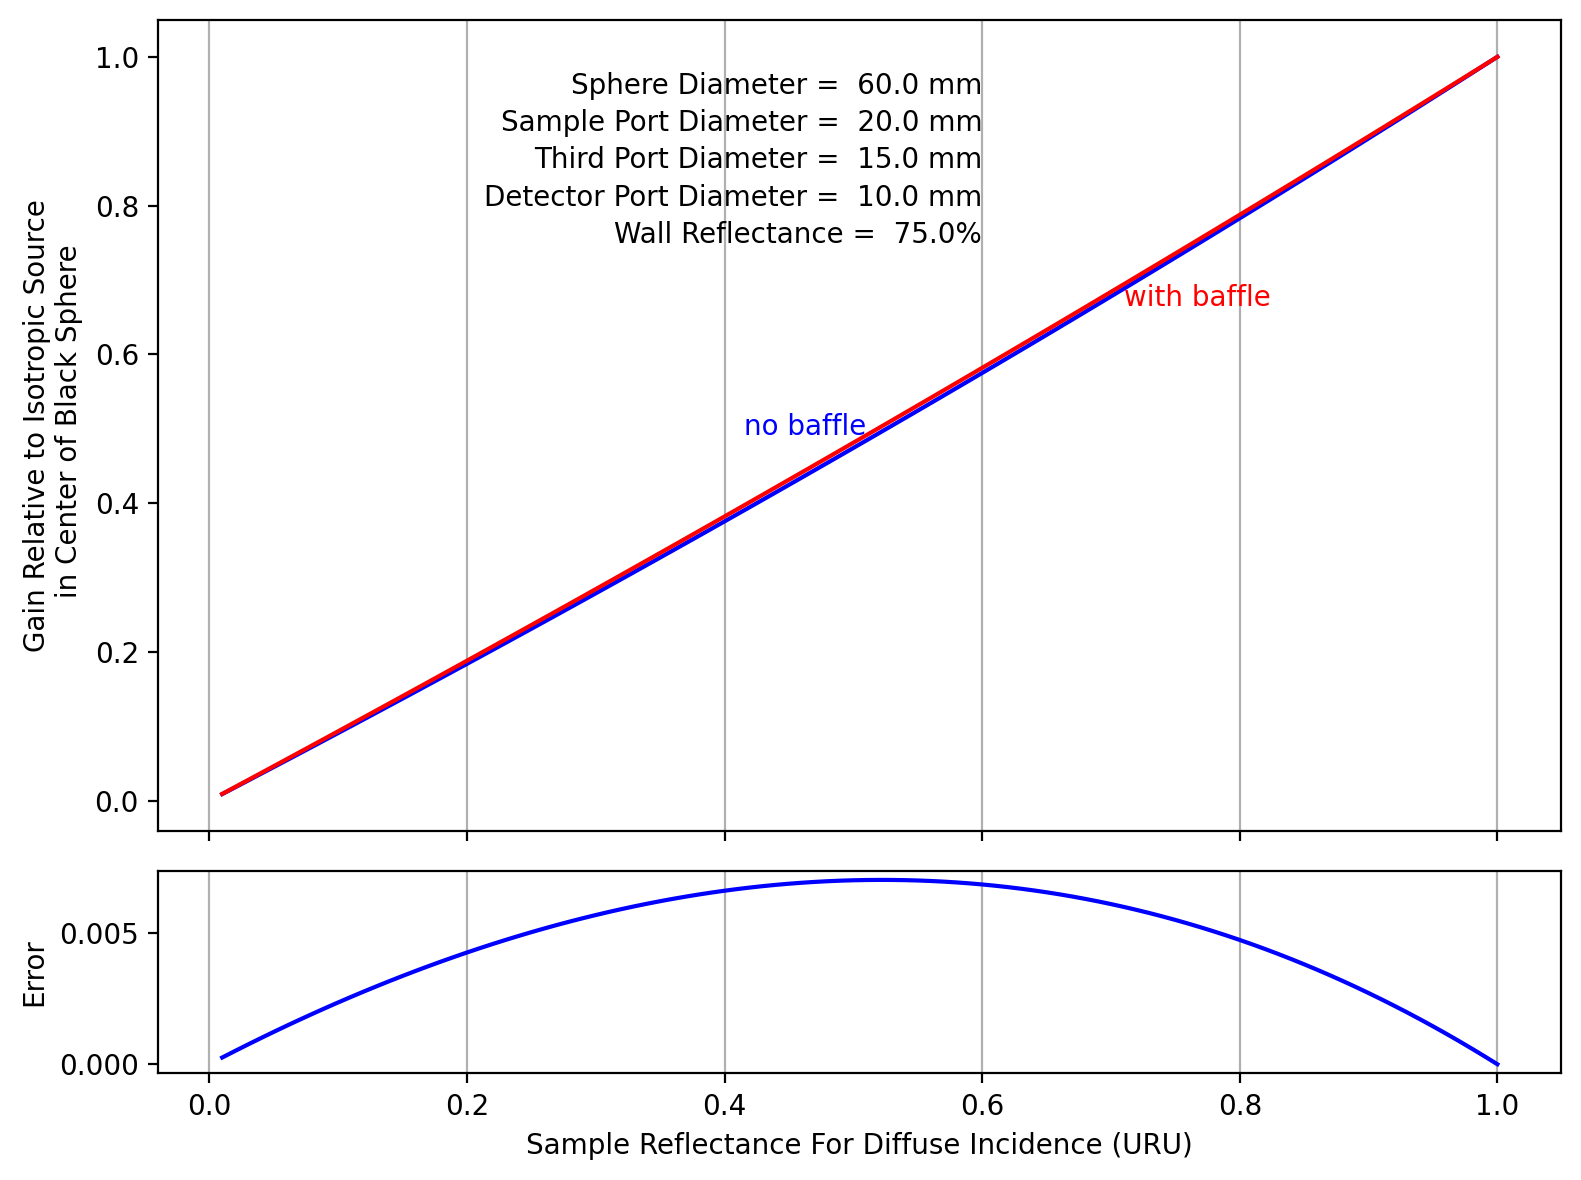

In [3]:
# Create a figure
plt.figure(figsize=(8, 6))

# Define the grid layout
gs = gridspec.GridSpec(
    2, 1, height_ratios=[4, 1]
)  # Two rows, one column, with different height ratios

# Create subplots
ax1 = plt.subplot(gs[0])  # This will occupy the first (top) grid
ax2 = plt.subplot(gs[1])  # This will occupy the second (bottom) grid

# Plot something in each subplot
# Top subplot (6x6)
plt.subplot(2, 1, 1)

plt.text(0.6, 0.95, "Sphere Diameter = %5.1f mm" % s.d, ha="right")
plt.text(0.6, 0.90, "Sample Port Diameter = %5.1f mm" % s.sample.d, ha="right")
plt.text(0.6, 0.85, "Third Port Diameter = %5.1f mm" % (s.third.d), ha="right")
plt.text(0.6, 0.80, "Detector Port Diameter = %5.1f mm" % (s.detector.d), ha="right")
plt.text(0.6, 0.75, "Wall Reflectance = %5.1f%%" % (100 * s.r_wall), ha="right")

sample_uru = np.linspace(0.01, 1, 100)
s.baffle = False
gain = s.gain(sample_uru)
measure = sample_uru * gain / gain[-1]
plt.plot(sample_uru, measure, "b")
plt.text(
    sample_uru[50], measure[50], "no baffle", color="blue", ha="right", va="bottom"
)

s.baffle = True
gain = s.gain(sample_uru)
measure1 = sample_uru * gain / gain[-1]
plt.plot(sample_uru, measure1, "r")
plt.text(sample_uru[70], measure1[70], "with baffle", color="red", ha="left", va="top")
plt.gca().set_xticklabels([])
plt.ylabel("Gain Relative to Isotropic Source\n in Center of Black Sphere")
plt.grid(True, axis="x")

plt.subplot(2, 1, 2)

plt.plot(sample_uru, (measure1 - measure), "b")
plt.xlabel("Sample Reflectance For Diffuse Incidence (URU)")
plt.ylabel("Error")
plt.grid(True, axis="x")
plt.tight_layout()
plt.show()

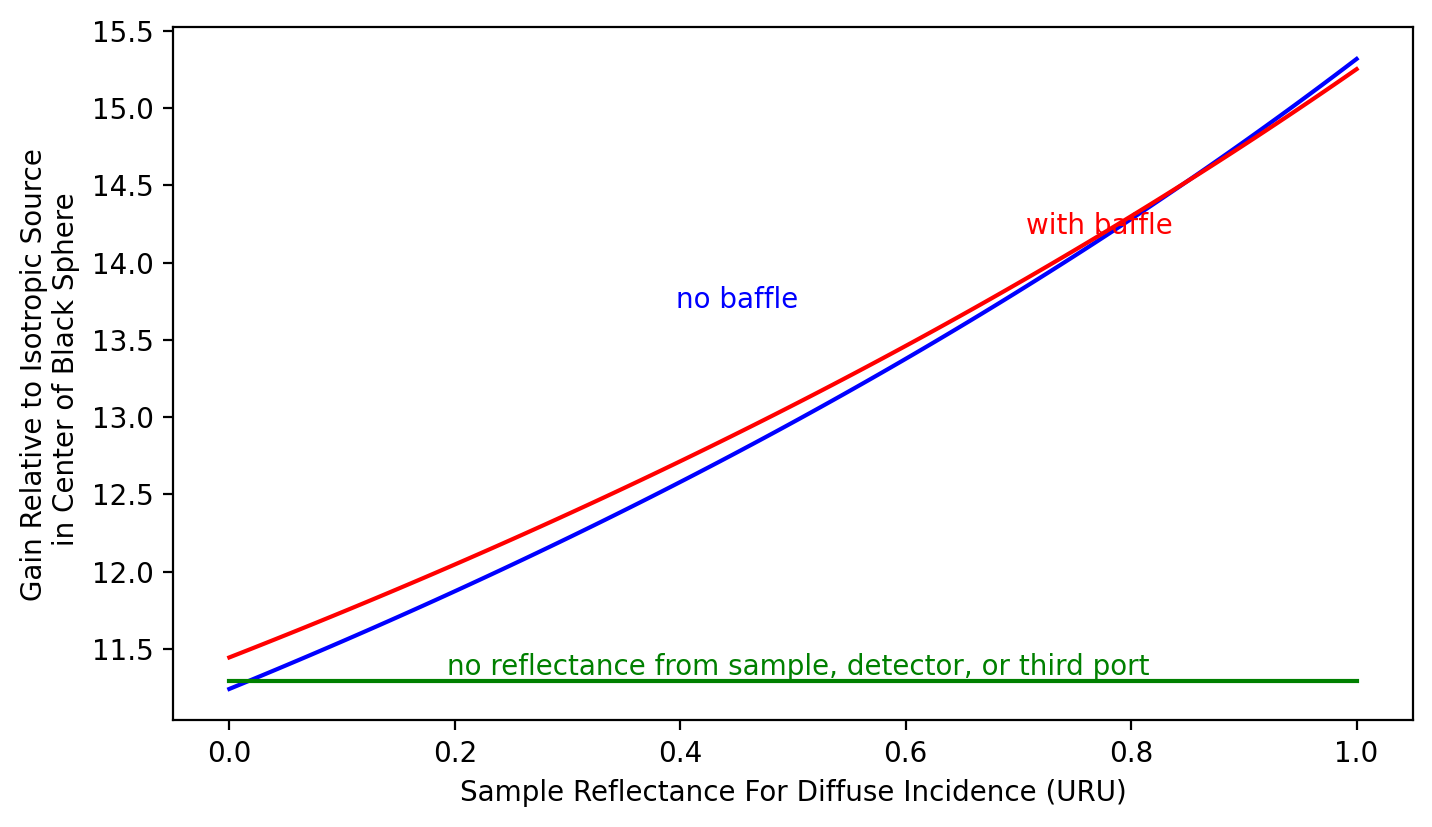

In [4]:
R = 50
r_wall = 0.95
r_std = 0.97
d_sphere = 2 * R
d_sample = 30
d_third = 20
d_detector = 18
s = iadpython.Sphere(
    d_sphere,
    d_sample,
    d_third=d_third,
    d_detector=d_detector,
    r_detector=0.5,
    r_wall=r_wall,
    r_std=r_std,
)

plt.figure(figsize=(8, 4.5))
sample_uru = np.linspace(0, 1, 100)

s.baffle = False
gain = s.gain(sample_uru)
plt.plot(sample_uru, gain * r_wall, "b")
plt.text(sample_uru[50], gain[50], "no baffle", color="blue", ha="right", va="bottom")

s.baffle = True
gain = s.gain(sample_uru)
plt.plot(sample_uru, gain * r_std, "r")
plt.text(sample_uru[70], gain[70], "with baffle", color="red", ha="left", va="top")

gain = np.full_like(sample_uru, 1 / (1 - s.a_wall * s.r_wall))
plt.plot(sample_uru, gain, "g")
plt.text(
    sample_uru[50],
    gain[50],
    "no reflectance from sample, detector, or third port",
    color="green",
    ha="center",
    va="bottom",
)

plt.xlabel("Sample Reflectance For Diffuse Incidence (URU)")
plt.ylabel("Gain Relative to Isotropic Source\n in Center of Black Sphere")
plt.show()